<a href="https://colab.research.google.com/github/kandkurteram/course-v3/blob/master/RamK_Lesson2_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.basics import *

In [0]:
n=100

In [0]:
x = torch.ones(n, 2)

In [4]:
x[:, 0].uniform_(-1., 1)

tensor([ 0.0181,  0.8013,  0.3124,  0.4315,  0.1159, -0.1551,  0.7334,  0.9885,
        -0.2974, -0.4101,  0.3895, -0.0108, -0.5882,  0.6053, -0.5458,  0.6932,
         0.4674,  0.9226, -0.6469, -0.6718, -0.9899, -0.4948, -0.8276,  0.6011,
         0.3964, -0.5308, -0.5254, -0.2538,  0.4343, -0.4192,  0.4152,  0.2277,
        -0.9194, -0.7379,  0.3569, -0.0597,  0.6921, -0.6622,  0.0886,  0.8448,
         0.5447, -0.6010,  0.7792, -0.2314, -0.2985,  0.2895,  0.1006, -0.7168,
        -0.4832, -0.2871, -0.9351, -0.7202,  0.6199, -0.3127,  0.9490, -0.5931,
        -0.1367,  0.3349, -0.1147,  0.9153,  0.4582,  0.8301, -0.7082, -0.0069,
         0.3128,  0.2532,  0.6907,  0.3779, -0.8244, -0.7305,  0.7931, -0.5161,
         0.9410,  0.6183, -0.8324,  0.3868, -0.5346, -0.5890,  0.8600,  0.4382,
         0.5191, -0.6261, -0.1018, -0.8907, -0.0224,  0.9673,  0.3477, -0.4541,
         0.5762,  0.3153, -0.7217, -0.8278,  0.7453,  0.1115,  0.4154,  0.0461,
        -0.6477,  0.3262,  0.5593, -0.00

In [5]:

a = tensor(3., 2)
a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

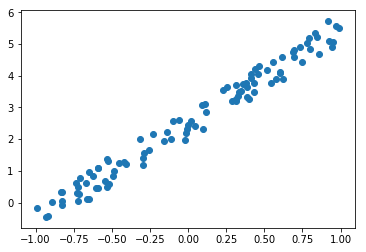

In [7]:
plt.scatter(x[:,0], y)

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
a =tensor(-1., 1)

In [0]:
y_hat = x@a

In [11]:
mse(y_hat, y)

tensor(7.9946)

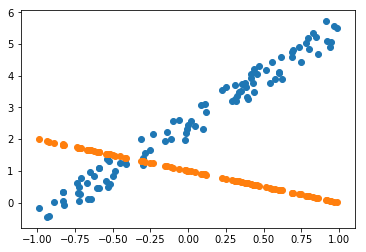

In [12]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

In [13]:
a =nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
#To understand this code go through below links: 
# https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py
# https://discuss.pytorch.org/t/detach-no-grad-and-requires-grad/16915
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if t%10==0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()
  
  

In [15]:
lr = 1e-1
for t in range(100):
  update()

tensor(7.9946, grad_fn=<MeanBackward0>)
tensor(1.3901, grad_fn=<MeanBackward0>)
tensor(0.3974, grad_fn=<MeanBackward0>)
tensor(0.1555, grad_fn=<MeanBackward0>)
tensor(0.0948, grad_fn=<MeanBackward0>)
tensor(0.0795, grad_fn=<MeanBackward0>)
tensor(0.0757, grad_fn=<MeanBackward0>)
tensor(0.0747, grad_fn=<MeanBackward0>)
tensor(0.0745, grad_fn=<MeanBackward0>)
tensor(0.0744, grad_fn=<MeanBackward0>)


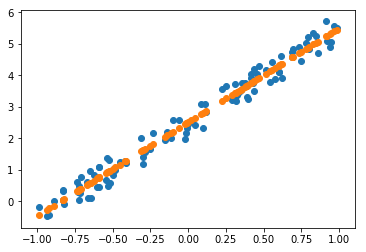

In [16]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)

In [0]:
from matplotlib import animation, rc

In [0]:
rc('animation', html='jshtml')

In [20]:
a = nn.Parameter(tensor(-1., 1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, =plt.plot(x[:, 0], x@a)
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)